<a href="https://colab.research.google.com/github/RayhanehCoding/Personal-Projects/blob/main/Portfolio_returns_during_the_crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python --version

Python 3.11.11


**Portfolio returns during the crisis
**

The first step in quantifying the effects of uncertainty on a financial portfolio is to examine the portfolio's return. You'll consider a portfolio of four investment bank stocks, which were both instigators and victims of the global financial crisis.

The banks are *Citibank*, *Goldman Sachs*, *J.P. Morgan*, and *Morgan Stanley*. Closing stock prices for the period *2005 - 2010* are in the available portfolio DataFrame. You'll use this to examine the dramatic price changes during the depths of the crisis, 2008 - 2009. You'll also see how volatile the resulting portfolio_returns were, assuming an equal-weighted portfolio with weights stored in the weights list

In [ ]:
import numpy as np
import pandas as pd # A Pandas DataFrame has a .plot() method that allows you to plot the time series.
import matplotlib.pyplot as plt

Download the data from yahoo fnance for these 4 banks.

In [ ]:
import yfinance as yf
from google.colab import files

# Define the stock tickers and the time range
tickers = ["C", "GS", "JPM", "MS"]  # Citigroup, Goldman Sachs, J.P. Morgan, Morgan Stanley
start_date = "2005-01-01"
end_date = "2010-12-31"

# fetch the data for each stock
for ticker in tickers:
  # download historical data
  data = yf.download(ticker, start= start_date, end=end_date)

  # save to csv
  file_name = f"{ticker}_2005_2010.csv"
  data.to_csv(file_name)
  print(f"saved {ticker} data to {file_name}")


Load and read the data gathered from the previous step

In [ ]:
# Read the CSV files into separate DataFrames
Citigroup_data = pd.read_csv('/content/drive/MyDrive/projects/CrisisData/C_2005_2010.csv')
Goldman_data = pd.read_csv('/content/drive/MyDrive/projects/CrisisData/GS_2005_2010.csv')
JPMorgan_data = pd.read_csv('/content/drive/MyDrive/projects/CrisisData/JPM_2005_2010.csv')
MorganStanley_data = pd.read_csv('/content/drive/MyDrive/projects/CrisisData/MS_2005_2010.csv')

print("Citigroup Columns:", Citigroup_data.columns) # to see the name of each column in the data files
print("Goldman Columns:", Goldman_data.columns)
print("JPMorgan Columns:", JPMorgan_data.columns)
print("Morgan Stanley Columns:", MorganStanley_data.columns)

# renaming the first column to 'Date':
Citigroup_data.rename(columns={"Price": "Date"}, inplace = True)
Goldman_data.rename(columns={"Price": "Date"}, inplace = True)
JPMorgan_data.rename(columns={"Price": "Date"}, inplace = True)
MorganStanley_data.rename(columns={"Price": "Date"}, inplace = True)

print(Citigroup_data.head())
print(Goldman_data.head())
print(JPMorgan_data.head())
print(MorganStanley_data.head())

Citigroup Columns: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Goldman Columns: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
JPMorgan Columns: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Morgan Stanley Columns: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
         Date               Close                High                 Low  \
0      Ticker                   C                   C                   C   
1        Date                 NaN                 NaN                 NaN   
2  2005-01-03   307.6042785644531  312.25625167777133   307.1581904258893   
3  2005-01-04  304.99151611328125   310.7905646355478  303.97189998064755   
4  2005-01-05     308.81494140625   310.8541534274699  306.01101272235223   

                 Open   Volume  
0                   C        C  
1                 NaN      NaN  
2  312.25625167777133  1474660  
3  307.66798658293953  1584

**Data Cleaning:**

To work with the data from 2008-2009, we first need to isolate the data from this time period for all the sources (4 stocks in this case) and create a dataframe containing the respective data. **Pandas** is a great tool for this.


The issue lies with the first two rows of each DataFrame. These rows contain headers and irrelevant data that were mistakenly included during the CSV reading process. The "Date" column, as well as others, have inconsistent values in these rows, which prevents proper datetime conversion and subsequent filtering

In [ ]:
# Convert the Date column to datetime format
# Drop the first two rows because they contain non-data values
for df in [Citigroup_data, Goldman_data, JPMorgan_data, MorganStanley_data]:
    df.drop(index=[0,1], inplace = True)
    # reset index after dropping
    df.reset_index(drop=True, inplace = True)
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    # converting from index 2 since the forst two elements of the Price column contains non-date values

print(Citigroup_data.dtypes)
print(Goldman_data.dtypes)
print(JPMorgan_data.dtypes)
print(MorganStanley_data.dtypes)

print(Citigroup_data.head())
print(Goldman_data.head())
print(JPMorgan_data.head())
print(MorganStanley_data.head())

Date      datetime64[ns]
Close            float64
High              object
Low               object
Open              object
Volume            object
dtype: object
Date      datetime64[ns]
Close            float64
High              object
Low               object
Open              object
Volume            object
dtype: object
Date      datetime64[ns]
Close            float64
High              object
Low               object
Open              object
Volume            object
dtype: object
Date      datetime64[ns]
Close            float64
High              object
Low               object
Open              object
Volume            object
dtype: object
        Date       Close                High                 Low  \
0 2005-01-03  307.604279  312.25625167777133   307.1581904258893   
1 2005-01-04  304.991516   310.7905646355478  303.97189998064755   
2 2005-01-05  308.814941   310.8541534274699  306.01101272235223   
3 2005-01-06  311.809906  313.78540699884894   310.5991213480736   
4 20

here I realized that the numeric values in the datasets were being read as Objects instead of numeric values, so I converted them to the proper data type.

In [ ]:
# Convert relevant columns to numeric again with more explicit cleaning
for df in [Goldman_data, JPMorgan_data, Citigroup_data, MorganStanley_data]:
    for column in ['Close']:
        # Strip any whitespace, convert to string, and remove any non-numeric characters
        df[column] = df[column].astype(str).str.replace(r'[^\d.]', '', regex=True)
        # Check if there are any remaining non-numeric values
        print(df[column].unique())
        # Convert to numeric
        df[column] = pd.to_numeric(df[column], errors='coerce')

for df, name in zip([Citigroup_data, Goldman_data, JPMorgan_data, MorganStanley_data],
                    ["Citigroup", "Goldman Sachs", "JPMorgan", "Morgan Stanley"]):
  print(f"\n{name} - Missing Dates:", df["Date"].isna().sum()) # check for missing dates
  print(f"{name} - Missing Close values:", df["Close"].isna().sum())  # Check for missing Close values

  # Check types after conversion
  print(f"{name} - Close column type after conversion:", df["Close"].dtype)

['' '77.27764892578125' '76.77693176269531' ... '131.5481414794922'
 '130.3352508544922' '130.34303283691406']
['' '22.725109100341797' '22.490882873535156' ... '28.953344345092773'
 '28.78346824645996' '28.69512939453125']
['' '307.6042785644531' '304.99151611328125' ... '36.0704231262207'
 '36.451725006103516' '36.299217224121094']
['' '30.451047897338867' '30.12419319152832' ... '20.152042388916016'
 '20.261919021606445' '20.020187377929688']

Citigroup - Missing Dates: 0
Citigroup - Missing Close values: 2
Citigroup - Close column type after conversion: float64

Goldman Sachs - Missing Dates: 0
Goldman Sachs - Missing Close values: 2
Goldman Sachs - Close column type after conversion: float64

JPMorgan - Missing Dates: 0
JPMorgan - Missing Close values: 2
JPMorgan - Close column type after conversion: float64

Morgan Stanley - Missing Dates: 0
Morgan Stanley - Missing Close values: 2
Morgan Stanley - Close column type after conversion: float64


I'm interested in the stock prices from the beginning of 2008 to the end of the year 2009.

In [ ]:
# now filter the date from 2008-2009
start_date = pd.to_datetime("2008-01-01")
end_date = pd.to_datetime("2009-12-31")

Citigroup_filtered = Citigroup_data[(Citigroup_data["Date"] >= start_date) & (Citigroup_data["Date"] <= end_date)].copy()
Goldman_filtered = Goldman_data[(Goldman_data["Date"] >= start_date) & (Goldman_data["Date"] <= end_date)].copy()
JPMorgan_filtered = JPMorgan_data[(JPMorgan_data["Date"] >= start_date) & (JPMorgan_data["Date"] <= end_date)].copy()
MorganStanley_filtered = MorganStanley_data[(MorganStanley_data["Date"] >= start_date) & (MorganStanley_data["Date"] <= end_date)].copy()


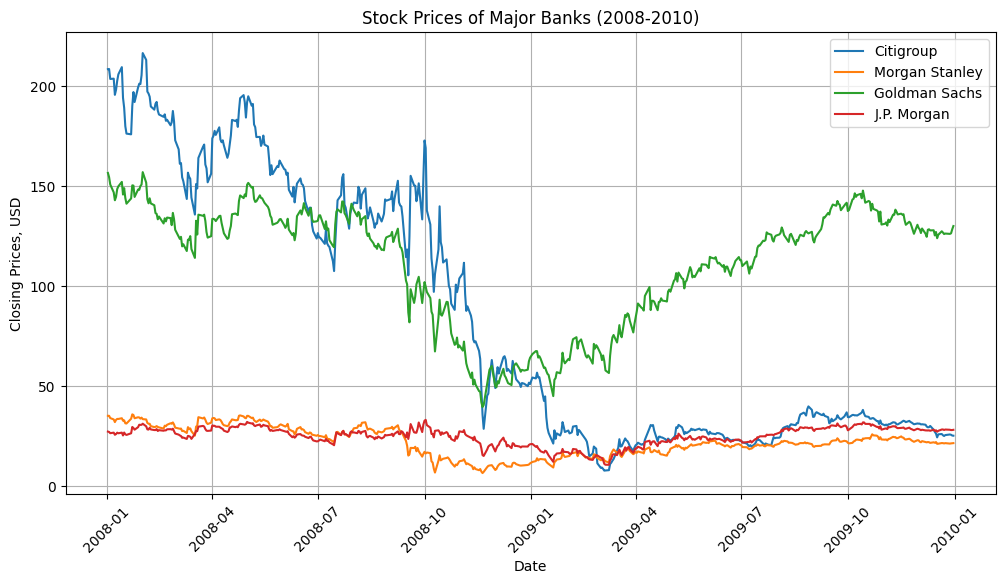

In [ ]:
import matplotlib.pyplot as plt

# List of datasets and their corresponding labels
datasets = {
    "Citigroup": Citigroup_filtered,
    "Morgan Stanley": MorganStanley_filtered,
    "Goldman Sachs": Goldman_filtered,
    "J.P. Morgan": JPMorgan_filtered,
}

# Set figure size
plt.figure(figsize=(12, 6))

# Loop through each dataset, filter data, and plot
for name, df in datasets.items():
    filtered_df = df[(df["Date"] >= start_date) & (df["Date"] <= end_date)].dropna(subset=["Close"])
    plt.plot(filtered_df["Date"], filtered_df["Close"], label=name)

# Formatting
plt.xlabel("Date")
plt.ylabel("Closing Prices, USD")
plt.title("Stock Prices of Major Banks (2008-2010)")
plt.legend()  # Show labels for each line
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In this next step, we are going to compute and plot the portfolio's daily returns which depend on the current "Close" price and the previous "Close" price.

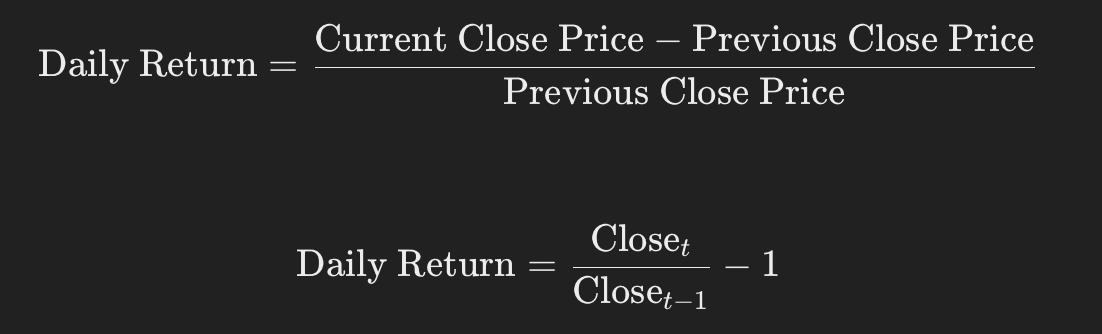

Frequency resampling primer
Risk factor models often rely upon data that is of different frequencies. A typical example is when using quarterly macroeconomic data, such as prices, unemployment rates, etc., with financial data, which is often daily (or even intra-daily). To use both data sources in the same model, higher frequency data needs to be resampled to match the lower frequency data.

In this section, we will convert daily returns data to weekly and quarterly frequencies

          Date  Citigroup  Morgan Stanley  Goldman Sachs  JPMorgan  \
755 2008-01-03   0.000346       -0.000196      -0.013295 -0.006877   
756 2008-01-04  -0.023850       -0.032195      -0.023970 -0.022684   
757 2008-01-07   0.000708       -0.020081      -0.026010  0.010017   
758 2008-01-08  -0.039632       -0.039536      -0.026857 -0.039671   
759 2008-01-09   0.012897        0.034684       0.011873  0.014106   

     Portfolio Return  
755         -0.005006  
756         -0.025675  
757         -0.008841  
758         -0.036424  
759          0.018390  


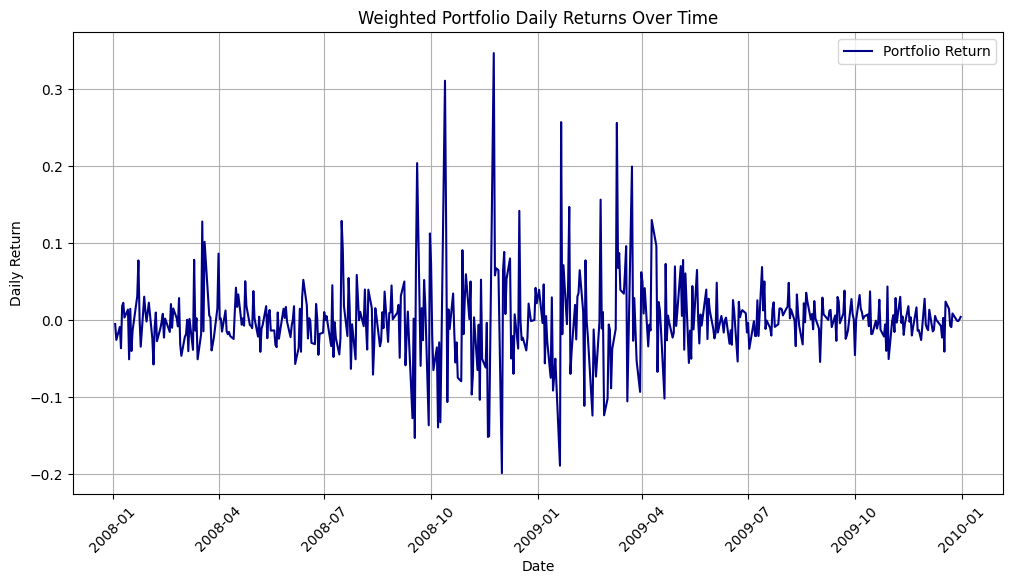

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# portfolio weights
weights = [0.25, 0.25, 0.25, 0.25]

# Ensure the datasets are sorted by date
for df in [Citigroup_data, Goldman_data, JPMorgan_data, MorganStanley_data]:
    df.sort_values(by="Date", inplace=True)

# Compute daily returns for each stock
for df, name in zip([Citigroup_filtered, Goldman_filtered, JPMorgan_filtered, MorganStanley_filtered],
                    ["Citigroup", "Goldman Sachs", "JPMorgan", "Morgan Stanley"]):
    df.loc[:, "Daily Return"] = df["Close"].pct_change()  # Compute daily return
    df.dropna(subset=["Daily Return"], inplace=True)  # Drop NaN values after computing returns

# Store filtered datasets in a dictionary for easy processing
datasets = {
    "Citigroup": Citigroup_filtered,
    "Morgan Stanley": MorganStanley_filtered,
    "Goldman Sachs": Goldman_filtered,
    "JPMorgan": JPMorgan_filtered
}

# Create a merged DataFrame with dates and daily returns
portfolio_filtered = pd.DataFrame()
portfolio_filtered["Date"] = Citigroup_filtered["Date"]
portfolio_filtered["Citigroup"] = Citigroup_filtered["Daily Return"].values
portfolio_filtered["Morgan Stanley"] = MorganStanley_filtered["Daily Return"].values
portfolio_filtered["Goldman Sachs"] = Goldman_filtered["Daily Return"].values
portfolio_filtered["JPMorgan"] = JPMorgan_filtered["Daily Return"].values

# Compute weighted portfolio daily returns
portfolio_filtered["Portfolio Return"] = (
    portfolio_filtered["Citigroup"] * weights[0] +
    portfolio_filtered["Morgan Stanley"] * weights[1] +
    portfolio_filtered["Goldman Sachs"] * weights[2] +
    portfolio_filtered["JPMorgan"] * weights[3]
)

# Display first few rows of the portfolio daily returns
print(portfolio_filtered.head())

# Plot portfolio returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_filtered["Date"], portfolio_filtered["Portfolio Return"], label="Portfolio Return", color="darkblue")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Weighted Portfolio Daily Returns Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Now let's generate the covariance matrix from the portfolio assets' returns and annualize the covariance using 252 trading days per year

In [ ]:
# Compute the covariance matrix of daily returns
cov_matrix_portfolio = portfolio_filtered.drop(columns=["Date", "Portfolio Return"]).cov()
cov_matrix_portfolio = cov_matrix_portfolio.round(3)

annulized_cov_matrix = cov_matrix_portfolio * 252

print(annulized_cov_matrix)

                Citigroup  Morgan Stanley  Goldman Sachs  JPMorgan
Citigroup           1.512           0.756          0.504     0.756
Morgan Stanley      0.756           1.260          0.756     0.504
Goldman Sachs       0.504           0.756          0.504     0.504
JPMorgan            0.756           0.504          0.504     0.756


Looking at the covariance matrix, **Citibank** has the highest annualized volatility over the time period 2008-2009!

Now, let's compute the portfolios volatility for the 2008-2009 period.

Quantifying risk involves **volatility**, a measure of the dispersion of portfolio returns around an expectation of what the returns will be, taking the sample average return as the expectation. But what variables or events will affect the expectation and the dispersion of returns? Such variables or events are known as the risk factors of a portfolio.

A portfolio's **risk exposure** is the possible portfolio loss due to return volatility. Think of risk exposure as the potential negative impact of an uncertain future. For example, you may insure your home against flood, but have to pay an initial loss amount yourself. This is called a **deductible**. If the rest of a flood's damage is fully covered by insurance, your deductible is your risk exposure. Building a home in an area that floods frequently increases the volatility of flood damage, raising your deductible due to the increased risk exposure.

In [ ]:
portfolio_variance = np.transpose(weights) @ annulized_cov_matrix @ weights
portfolio_volatility = np.sqrt(portfolio_variance)

print("Portfolio Volatility: ", portfolio_volatility)
print("Portfolio Variance", portfolio_variance)

Portfolio Volatility:  0.8511756575466664
Portfolio Variance 0.7244999999999999


Now we are going to calculate the 30-day rolling window of portfolio returns to create a time series of the volatility and visualize this with a plot.

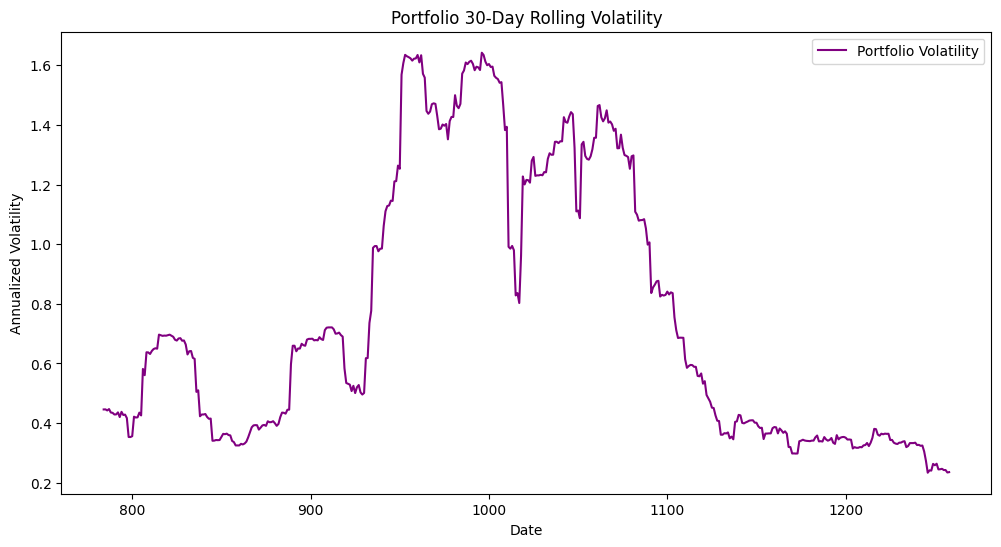

In [ ]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_filtered["Portfolio Return"].rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
plt.figure(figsize=(12,6))
volatility_series.plot(color="purple", label="Portfolio Volatility")
plt.xlabel("Date")
plt.ylabel("Annualized Volatility")
plt.title("Portfolio 30-Day Rolling Volatility")
plt.legend()
plt.show()

Citibank exhibited the highest volatility during the crisis period, with Morgan Stanley not far behind. The volatility plot shows that an equal-weighted portfolio of all four banks demonstrated a significant increase in volatility from late September 2008, which is around the time the 4th-largest investment bank in the world, Lehman Brothers, went bankrupt. Its bankruptcy was largely due to mismanagement of the risks associated with its holdings of mortgage-backed securities.

Factor models assess the impact of systematic and/or idiosyncratic risk on returns. A factor model uses a statistical regression, often **Ordinary Least Squares (or OLS)**, to **regress returns** (or returns volatility) on risk factors. Factor models such as the Fama-French model use a combination of market risk and idiosyncratic risk, where the latter is the size of the firm (market cap) and the firm's value (book-to-market ratio).

**Crisis Risk Factor: mortgage-backed securities**
*  Investment banks: borrowed heavily just before the crisis
*  Collateral: mortgage-backed securities (MBS)
*  MBS: are supposed to diversify risk by holding many mortgages of different characteristics. (flaw: these values were miscalculated because mortgage default risk was highly correlated between home owners).
*  Avalanche of delinquencies/default destroyed collateral value


How to model MBS: as a risk factor using a percentage of mortgages at last 90 days behind in repayment.

**Crisis factor Model:**

Factor model regression: portfolio returns vs. mortgage delinquency.


In [ ]:
portfolio_filtered["Date"] = pd.to_datetime(portfolio_filtered["Date"])  # Convert to datetime
portfolio_filtered.set_index("Date", inplace=True)  # Set as index

# convert daily retirns to quarterly average returns
quarterly_returns = portfolio_filtered.resample('QE').mean()
print(portfolio_filtered.head())

# convert daily returns to weekly minimum returns
weekly_returns = portfolio_filtered.resample('W').min()
print(weekly_returns.head())

            Citigroup  Morgan Stanley  Goldman Sachs  JPMorgan  \
Date                                                             
2008-01-03   0.000346       -0.000196      -0.013295 -0.006877   
2008-01-04  -0.023850       -0.032195      -0.023970 -0.022684   
2008-01-07   0.000708       -0.020081      -0.026010  0.010017   
2008-01-08  -0.039632       -0.039536      -0.026857 -0.039671   
2008-01-09   0.012897        0.034684       0.011873  0.014106   

            Portfolio Return  
Date                          
2008-01-03         -0.005006  
2008-01-04         -0.025675  
2008-01-07         -0.008841  
2008-01-08         -0.036424  
2008-01-09          0.018390  
            Citigroup  Morgan Stanley  Goldman Sachs  JPMorgan  \
Date                                                             
2008-01-06  -0.023850       -0.032195      -0.023970 -0.022684   
2008-01-13  -0.039632       -0.039536      -0.026857 -0.039671   
2008-01-20  -0.072953       -0.045157      -0.041458 -0.

This next step includes visualizing risk factor correlations. Since I don't have the data for mortgage delinquency rates stored in a csv file, I am going to define a dictionary here containing that data.

In [ ]:
data = [
    ("2008-03-31", 0.044),
    ("2008-06-30", 0.053),
    ("2008-09-30", 0.066),
    ("2008-12-31", 0.080),
    ("2009-03-31", 0.086),
    ("2009-06-30", 0.095),
    ("2009-09-30", 0.103),
    ("2009-12-31", 0.115),
]

df = pd.DataFrame.from_records(data, columns=["Date", "Mortgage Delinquency Rate"])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

print(df.head())

            Mortgage Delinquency Rate
Date                                 
2008-03-31                      0.044
2008-06-30                      0.053
2008-09-30                      0.066
2008-12-31                      0.080
2009-03-31                      0.086


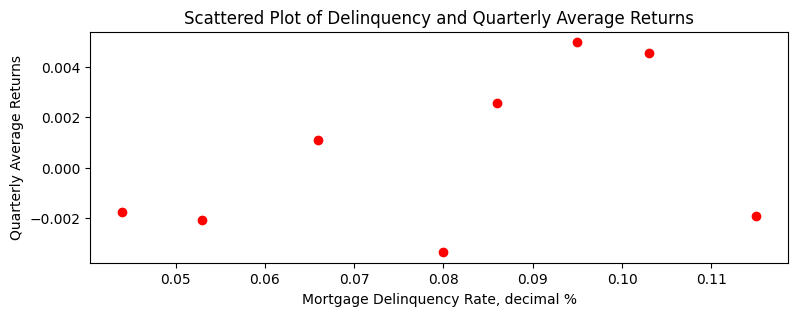

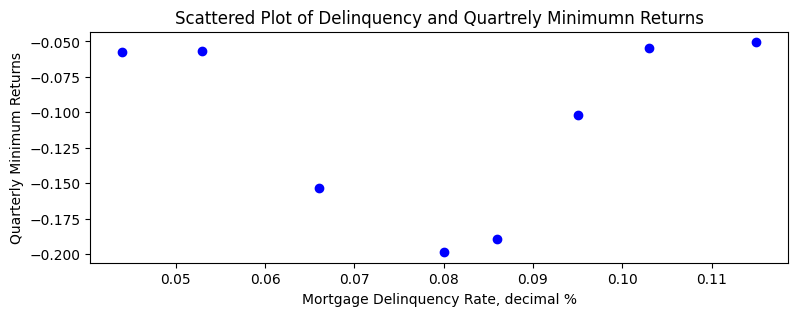

In [ ]:
# Transform the daily portfolio_filtered into quarterly average returns
portfolio_q_average = portfolio_filtered.resample('QE').mean().dropna()

# Create a scatterplot between delinquency and quarterly average returns
plt.figure(figsize=(9,3))
plt.scatter(df['Mortgage Delinquency Rate'], portfolio_q_average['Portfolio Return'], color = 'red')
plt.xlabel('Mortgage Delinquency Rate, decimal %')
plt.ylabel('Quarterly Average Returns')
plt.title('Scattered Plot of Delinquency and Quarterly Average Returns')
plt.show()
#-------------------------------------------------------------------------
# Transform daily portfolio_filtered returns into quarterly minimum returns
portfolio_q_min = portfolio_filtered.resample('QE').min().dropna()

# Create a scatterplot between delinquency and quarterly minimum returns
plt.figure(figsize=(9,3))
plt.scatter(df['Mortgage Delinquency Rate'], portfolio_q_min['Portfolio Return'], color = 'blue')
plt.xlabel('Mortgage Delinquency Rate, decimal %')
plt.ylabel('Quarterly Minimum Returns')
plt.title('Scattered Plot of Delinquency and Quartrely Minimumn Returns')
plt.show()


Now, we can have a look at the correlation between the delinquency rates and minimum quarterly returns using the Ordinary Least-Squares (OLS) factor model.

You'll compare three factor models with three different quarterly dependent variables: average returns, minimum returns, and average volatility. The independent variable is the mortgage delinquency rate. In the regression summary, examine the coefficients' t-statistic for statistical significance, as well as the overall R-squared for goodness of fit

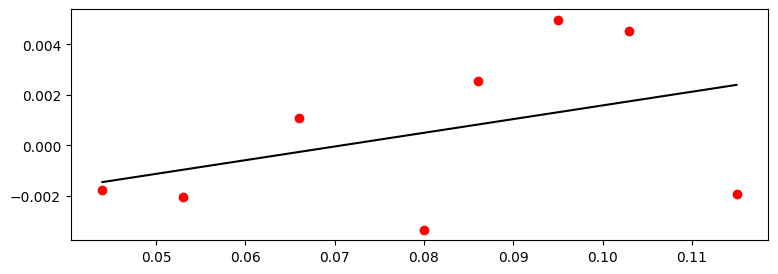

                            OLS Regression Results                            
Dep. Variable:       Portfolio Return   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.232
Date:                Tue, 25 Feb 2025   Prob (F-statistic):              0.310
Time:                        13:35:35   Log-Likelihood:                 35.799
No. Observations:                   8   AIC:                            -67.60
Df Residuals:                       6   BIC:                            -67.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import statsmodels.api as sm
# add a constant to the regression
mort_del = sm.add_constant(df['Mortgage Delinquency Rate'])

# create a regression model and fit it to the data
model = sm.OLS(portfolio_q_average['Portfolio Return'], mort_del).fit()

# scatter plot
plt.figure(figsize=(9,3))
plt.scatter(df['Mortgage Delinquency Rate'], portfolio_q_average['Portfolio Return'], color = 'red')

# generate the predicted values
x_values = (df['Mortgage Delinquency Rate'].min(), df['Mortgage Delinquency Rate'].max())
x_values_const = sm.add_constant(x_values)
y_pred = model.predict(x_values_const)

# plot regression line
plt.plot(x_values, y_pred, color='black', label='Regression Line')

plt.show()

# print the summary
print(model.summary())


In [ ]:
# we do the same for the minimum quarterly returns
model = sm.OLS(portfolio_q_min['Portfolio Return'], mort_del).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Portfolio Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.166
Method:                 Least Squares   F-statistic:                  0.004201
Date:                Tue, 25 Feb 2025   Prob (F-statistic):              0.950
Time:                        13:35:39   Log-Likelihood:                 11.241
No. Observations:                   8   AIC:                            -18.48
Df Residuals:                       6   BIC:                            -18.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


**Modern Portfolio Theory**

An efficient portfolio is one with weights generating the highest expected return for a given level of risk. To compute this, we need the portfolio volatility and expected returns. The **Constrained Line Algorithm** class (or **CLA**) from the **PyPortfolioOpt** library will allow us to compute the entire Efficient Frontier of a portfolio in the form of (risk, return) pairs. In this next step, we will find and visualize the efficient frontier for the bank portfolio during the 2005-2010 period.

To create the CLA object we should:

1. Calculate the Expected Returns using historical asset data
2. Find the efficient estimate of the Covariance Matrix using Covariance Shrinkage. (this method shrinks the errors that can be caused by sampling) We can use the **Lediot_Wolf **method here.
3. Find the Minimum Variance Portfolio (`cla.min_volatility()`)
4. and finally, create the object using `cla.efficient_frontier()`

In the end, we will visualize the efficient frontier using a scatter plot of the (vol, ret) pairs.


We will examine the efficient frontier for the portfolio before, during, and after the crisis.

I had to install the PyPortfolio library fro nthe github source, you might not need to.

In [ ]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt

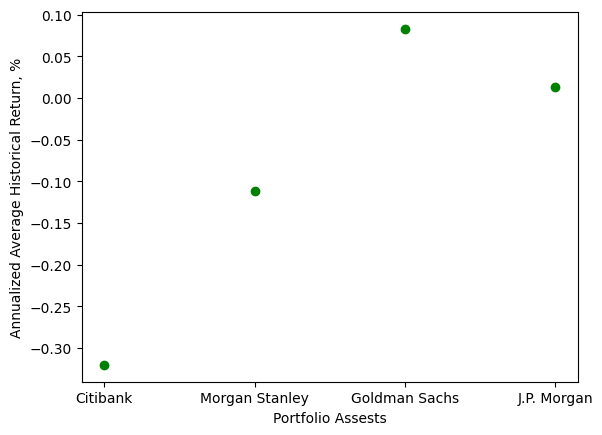

In [ ]:
from pypfopt.expected_returns import mean_historical_return

# load the investment portfolio data into the price variable
prices = pd.read_csv('/content/drive/MyDrive/projects/CrisisData/crisis_portfolio.csv')

# Convert the 'Date' column to a datetime index
prices['Date'] = pd.to_datetime(prices['Date'], format='%d/%m/%Y')
prices.set_index(['Date'], inplace = True)

# compute the annualized average historical return
mean_returns = mean_historical_return(prices, frequency = 252)

# plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o', color = 'green')
plt.xlabel('Portfolio Assests')
plt.ylabel('Annualized Average Historical Return, %')
plt.show()

In [ ]:
# import the Covariance shrinkage object
from pypfopt.risk_models import CovarianceShrinkage

# create the CovarianceShrinkage instance variable
cov_shrink = CovarianceShrinkage(prices)

# compute the sample covariance matrix of returns
sample_cov = prices.pct_change().cov() * 252
sample_cov = sample_cov.round(3)

# compute the efficient covariance matrix of returns
eff_cov = cov_shrink.ledoit_wolf()
eff_cov = eff_cov.round(3)

# display both the sample covariance_matrix and the efficient eff_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", eff_cov, "\n")

Sample Covariance Matrix
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank           0.536           0.305          0.218        0.270
Morgan Stanley     0.305           0.492          0.259        0.218
Goldman Sachs      0.218           0.259          0.218        0.171
J.P. Morgan        0.270           0.218          0.171        0.264 

Efficient Covariance Matrix
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank           0.528           0.289          0.206        0.255
Morgan Stanley     0.289           0.486          0.245        0.207
Goldman Sachs      0.206           0.245          0.226        0.162
J.P. Morgan        0.255           0.207          0.162        0.270 



Although the differences between the sample covariance and the efficient covariance (found by shrinking errors) may seem small, they have a huge impact on estimation of the optimal portfolio weights and the generation of the efficient frontier. Practitioners generally use some form of efficient covariance for Modern Portfolio Theory.


In this next step, we will break down the 2005-2010 period into 3 sub-periods or epochs

before (2005-2006),

during (2007-2008),

and after(2009-2010).

We will compute the efficient covariance matrix, and compare them to each other.

In [ ]:
# create a dictionary of time periods (or ''epochs)
epochs = {'before' : {'start' : '1-1-2005', 'end' : '31-12-2006'},
          'during' : {'start' : '1-1-2007', 'end' : '31-12-2008'},
          'after' :{'start' : '1-1-2009', 'end' : '31-12-2010'}
          }

# Compute the efficient covariance for each epoch
eff_cov = {}

for epoch in epochs.keys():
  # select the price data for the current epoch
  sub_price = prices.loc[epochs[epoch]['start']:epochs[epoch]['end']]
  # Compute log returns
  returns = sub_price.pct_change()
  # store mean returns
  mean_returns[epoch] = returns.mean()
  # Compute covariance matrix using Ledoit-Wolf shrinkage
  eff_cov[epoch] = CovarianceShrinkage(sub_price).ledoit_wolf().round(3)


# Compute the dot product between mean returns and covariance matrix for each epoch
dot_products = {}

for epoch in epochs.keys():
  mean_ret_array = mean_returns[epoch].values # Convert mean returns to a NumPy array
  cov_matrix_array = eff_cov[epoch].values    # Convert covariance matrix to a NumPy array

  # compute the dot product
  dot_products[epoch] = np.dot(mean_ret_array, cov_matrix_array).round(3)

# print results:
for epoch, result in dot_products.items():
  print(f"Dot product of returns and covariance matrix for {epoch} period:\n", result)

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n", eff_cov)


Dot product of returns and covariance matrix for before period:
 [0. 0. 0. 0.]
Dot product of returns and covariance matrix for during period:
 [-0.003 -0.003 -0.002 -0.002]
Dot product of returns and covariance matrix for after period:
 [0.002 0.002 0.001 0.002]
Efficient Covariance Matrices
 {'before':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank           0.018           0.014          0.013        0.014
Morgan Stanley     0.014           0.043          0.031        0.017
Goldman Sachs      0.013           0.031          0.044        0.018
J.P. Morgan        0.014           0.017          0.018        0.024, 'during':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank           0.713           0.465          0.324        0.365
Morgan Stanley     0.465           0.994          0.435        0.299
Goldman Sachs      0.324           0.435          0.409        0.225
J.P. Morgan        0.365           0.299          0.225       

The breakdown of the 2005 - 2010 period into sub-periods shows how the portfolio's risk increased during the crisis, and this changed the risk-return trade-off after the crisis.

Finally it is time to visualize the changes that took place in the **efficient frontier**, showing how the crisis created a much higher baseline for *any* given return.

OrderedDict([('Citibank', 0.6765962641924067), ('Morgan Stanley', 0.030643389085581618), ('Goldman Sachs', 0.06262971554144824), ('J.P. Morgan', 0.23013063118056384)])


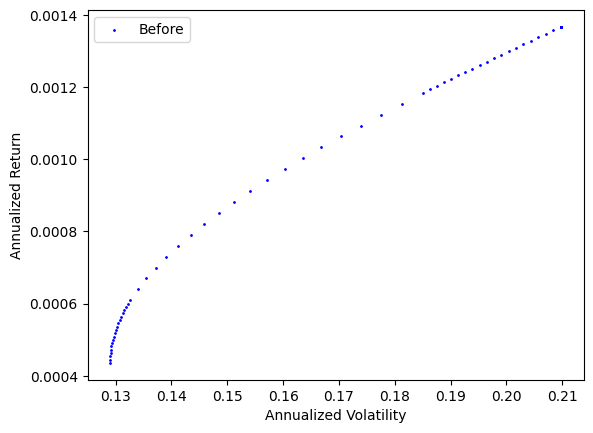

In [ ]:
from pypfopt.cla import CLA

# Initialize the Critical Line Algorithm object
efficient_portfolio_before = CLA(mean_returns['before'], eff_cov['before'])

print(efficient_portfolio_before.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_before.efficient_frontier()
(ret_before, vol_before, weights_before) = efficient_portfolio_before.efficient_frontier()

plt.scatter(vol, ret, s = 4, c='b', marker = '.', label = 'Before')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.show()

OrderedDict([('Citibank', 0.0), ('Morgan Stanley', 0.0), ('Goldman Sachs', 0.5183246073298431), ('J.P. Morgan', 0.481675392670157)])
OrderedDict([('Citibank', 0.6765962641924067), ('Morgan Stanley', 0.030643389085581618), ('Goldman Sachs', 0.06262971554144824), ('J.P. Morgan', 0.23013063118056384)])
OrderedDict([('Citibank', 0.0), ('Morgan Stanley', 0.03420468269118393), ('Goldman Sachs', 0.8616619268378201), ('J.P. Morgan', 0.10413339047099607)])


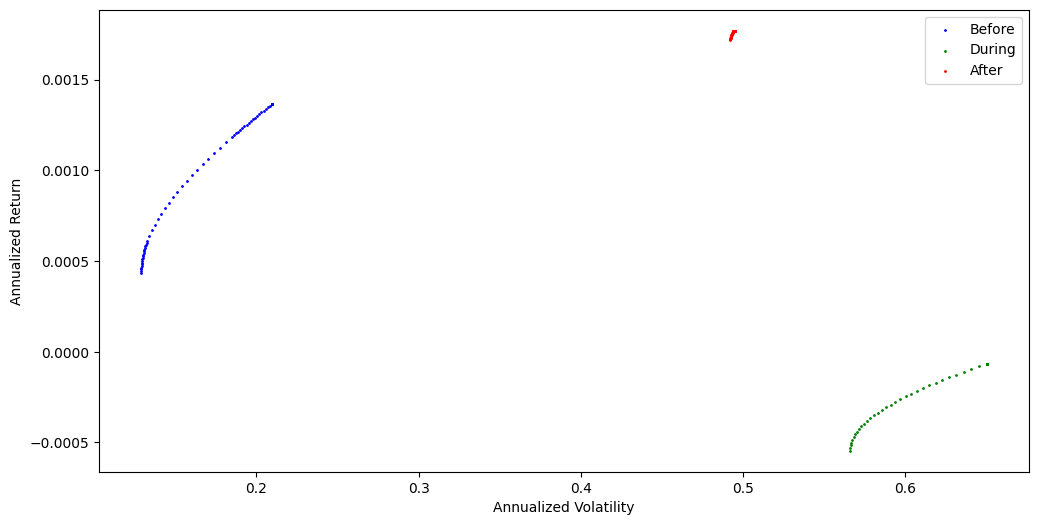

In [ ]:
from pypfopt.cla import CLA

# Initialize the Critical Line Algorithm object
efficient_portfolio_during = CLA(mean_returns['during'], eff_cov['during'])
efficient_portfolio_before = CLA(mean_returns['before'], eff_cov['before'])
efficient_portfolio_after = CLA(mean_returns['after'], eff_cov['after'])

print(efficient_portfolio_during.min_volatility())
print(efficient_portfolio_before.min_volatility())
print(efficient_portfolio_after.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()
(ret_before, vol_before, weights_before) = efficient_portfolio_before.efficient_frontier()
(ret_after, vol_after, weights_after) = efficient_portfolio_after.efficient_frontier()

plt.figure(figsize=(12,6))
plt.scatter(vol_before, ret_before, s = 4, c='b', marker = '.', label = 'Before')
plt.scatter(vol, ret, s = 4, c='g', marker = '.', label = 'During')
plt.scatter(vol_after, ret_after, s = 4, c='r', marker = '.', label = 'After')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.show()

Looking at an efficient frontier plot before the crisis, one portfolio has the least possible volatility. This point is the minimum variance portfolio and sits lowest on the curve and is often used as a benchmark for assessing an investor's risk appetite. (If an investor wishes to carry more risk, that portfolio would therefore carry more returns).

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

We've examined how the efficient frontier allows us to trade off risk and return. But how do we measure risk? We'll estimate how much a portfolio stands to lose, using the Value at Risk and Conditional Value at Risk statistics.

Suppose a European investor holds a foreign exchange portfolio holding 100 US Dollars. The investor's portfolio exposes them to the Euro for Dollar exchange rate, since the investor ultimately values the portfolio return in Euros. If the starting value of the portfolio is 100 Euros, the exchange rate is 1 Euro per Dollar. But in general, the portfolio's value will fluctuate, because the exchange rate 'r' is random. The loss will be the difference between the original portfolio value of 100 Euros and the new value of 'r' times 100. A loss distribution tells us a portfolio’s future potential losses due to the random nature of its risk factors, when holdings are fixed over a time horizon.

Losses cannot be bounded with 100% cenrtainty so we replace the 100% certainty with the liklihood of upper bound, or **Confidence Level**. We can ask questions like: **What is the maximum loss that would take place 95% of the time?**

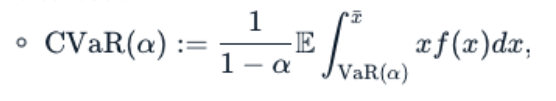

The **Value at Risk (VaR)** : measures the maximum portfolio loss for a given confidence level. VaR is usually expressed for 95%, 99%, or 99.5% percent confidence levels.

The **Conditional Value at Risk (CVaR)** :  asks what the expected loss will be provided that the loss is greater than the VaR. CVaR is the expected value of the loss over the tail of the loss distribution.

**To derive the VaR:**
1. Specify the confidence level (e.g. 0.95)
2. Create a Series of loss observations
3. Compute the `loss.quantile()` at specefied confidence level.
4. VaR = computed `.quantile()` at desired confidence level.

If we know that losses are distributed according to a statistical distrbution (like the normal distribution), we can use the percent point function `.ppf()` from `scipy.stats` to find the VaR. When the distribution is known, it is easier to use `.ppf()`

**To derive the CVaR:**

1. Specify the confidence level (e.g. 0.95)
2. Create or use sample from loss distribution
3. Compute the VaR at the specified confidence level (either using `.ppf()` or `.quantile()`).
4. Compute CVaR as expected loss (Normal distribution; `scipy.stats.norm.expect()` does this)

The VaR is used to find the expected value of the tail loss. For normally distributed losses the CVaR is calculated using the .expect() function of scipy, but if they are not normally distributed, you need to use the integral form of calculating CVaR.


95% VaR (maximum loss that is expected to occur 95% of the time): 1.6448536269514722
99% VaR (maximum loss that is expected to occur 99% of the time): 2.3200692032222405


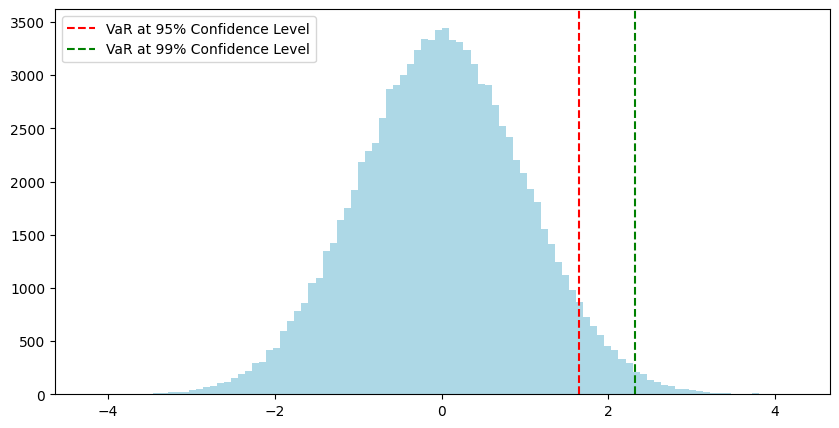

In [ ]:
# For this step, we assume that the loss is normally distributed

import scipy.stats as stats
import numpy as np

# create the VaR measure at the 95% confidence level using morm.ppf() | ppf() is the inverse cumulative density function
VaR_95 = stats.norm.ppf(0.95)

# create the VaR measure at the 99% confidence level using numpy.quantile()
draws = stats.norm.rvs(size = 100000)
VaR_99 = np.quantile(draws, 0.99)

# compare the 95% and 99% VaR
print("95% VaR (maximum loss that is expected to occur 95% of the time):", VaR_95)
print("99% VaR (maximum loss that is expected to occur 99% of the time):", VaR_99)

# plot the normal distribution histogram and the 95% VaR measure
plt.figure(figsize=(10,5))
plt.hist(draws, bins= 100, color ='lightblue')
plt.axvline(x = VaR_95, color = 'red', linestyle = '--',label = "VaR at 95% Confidence Level")
plt.axvline(x = VaR_99, color = 'green', linestyle = '--',label = "VaR at 99% Confidence Level")
plt.legend()
plt.show()

The conditional value at risk (CVaR), or expected shortfall (ES), asks what the average loss will be, conditional upon losses exceeding some threshold at a certain confidence level. It uses VaR as a point of departure, but contains more information because it takes into consideration the tail of the loss distribution. We'll first compute the 95% VaR for a Normal distribution of portfolio losses, with the same mean and standard deviation as the 2005-2010 investment bank portfolio_losses. We'll then use the VaR to compute the 95% CVaR, and plot both against the Normal distribution.


We need to first calculate the **portfolio losses**.

In [ ]:
portfolio_full = pd.DataFrame()
portfolio_full['Date'] = Citigroup_data['Date']

for df in [Citigroup_data, MorganStanley_data, Goldman_data, JPMorgan_data]:
  df["Daily Return"] = df["Close"].pct_change()
 # df["Daily Return"] = pd.to_numeric(df["Daily Return"], errors="coerce")
  df.dropna(subset=["Daily Return"], inplace=True)

# compute the portfolio returns as the average of individial returns (the weight of each stock is equal int he portfolio)
portfolio_full['full_portfolio_returns'] = (
    Citigroup_data["Daily Return"] +
    MorganStanley_data["Daily Return"] +
    Goldman_data["Daily Return"] +
    JPMorgan_data["Daily Return"]
)/4

# Convert to float, ensuring no non-numeric values
#portfolio_full["full_portfolio_returns"] = pd.to_numeric(portfolio_full["full_portfolio_returns"], errors="coerce")
#portfolio_full.dropna(subset=["full_portfolio_returns"], inplace=True)

portfolio_losses = portfolio_full[portfolio_full['full_portfolio_returns'] < 0]
portfolio_losses = portfolio_losses.reset_index(drop=True)
print(portfolio_losses.columns)

Index(['Date', 'full_portfolio_returns'], dtype='object')


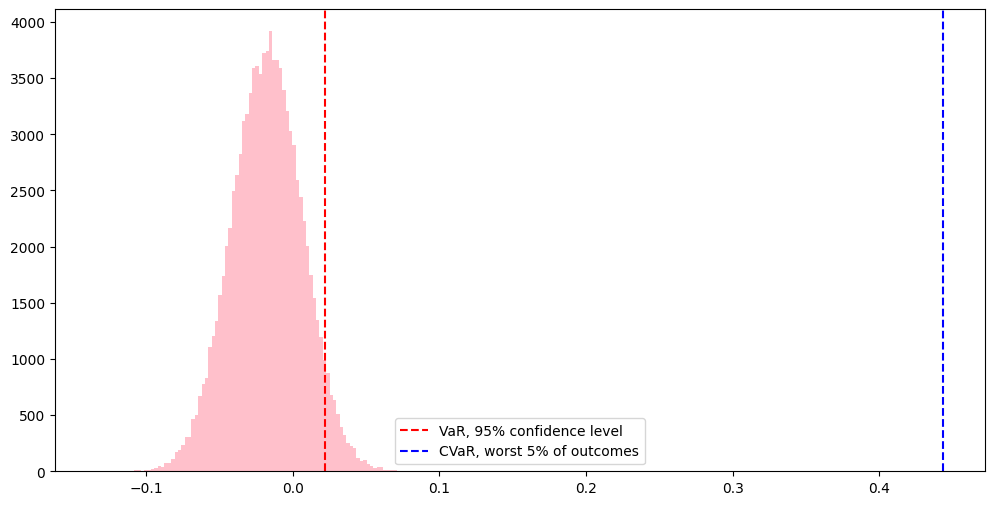

In [ ]:
import scipy.stats as stats
# Compute the mean and standard deviation of the portfolio returns
pmean = portfolio_losses['full_portfolio_returns'].mean()
pstd = portfolio_losses['full_portfolio_returns'].std()

# Compute the 95% VaR using the .ppf()
VaR_95_loss = stats.norm.ppf(0.95, loc = pmean, scale = pstd)

# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = stats.norm.expect(lambda x: x, loc =pmean, scale = pstd, lb = VaR_95_loss)
CVaR_95_loss = (1 / (1-0.95)) * VaR_95_loss

# Plot the normal distribution histogram and add lines for the VaR and CVaR
plt.figure(figsize=(12,6))
plt.hist(stats.norm.rvs(size = 100000, loc = pmean, scale = pstd), bins = 100, color='pink')
plt.axvline(x = VaR_95_loss, color = 'red', linestyle = '--', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95_loss, color = 'blue', linestyle = '--', label = "CVaR, worst 5% of outcomes")
plt.legend()
plt.show()

The CVaR is a richer measure of risk than the VaR, but can be more difficult to compute when the distribution of losses (or returns) is unknown, or is more complicated than a Normal distribution. Nevertheless, both measures are used in risk management to identify 'danger signs' when portfolio losses approach the VaR or CVaR threshold

**2. Risk Exposure and VaR**

Risk exposure is the product of the **probability** of an event causing a **loss**, multiplied by the amount of a loss if one should occur. The amount of the loss is often the VaR, as it is the minimum amount 'in danger' of being lost at the VaR's confidence level.

* Enterprise/institutional risk management : preferences as ***risk apeetite***
* Individual investors: preferences as ***risk tolerance***

For small samples, the Student's t-distribution might be better. This model has fatter tails compared to the normal distribution and often occurs with portfolio returns and losses. `Import t` from `scipy.stats` and fit the `portfolio_loss` data using `t.fit()`. And lastly use `ppf()` to calculate the VaR. The number of degrees of freedom in this model are the number of independent observations.

In this next part, we are going to compute an array of 99% VaR measures from the T distribution (with 30-1 = 29 degrees of freedom), using 30-day rolling windows from the portfolio losses and plot the risk exposure for the portfolio.

**VaR and Risk Exposure:**

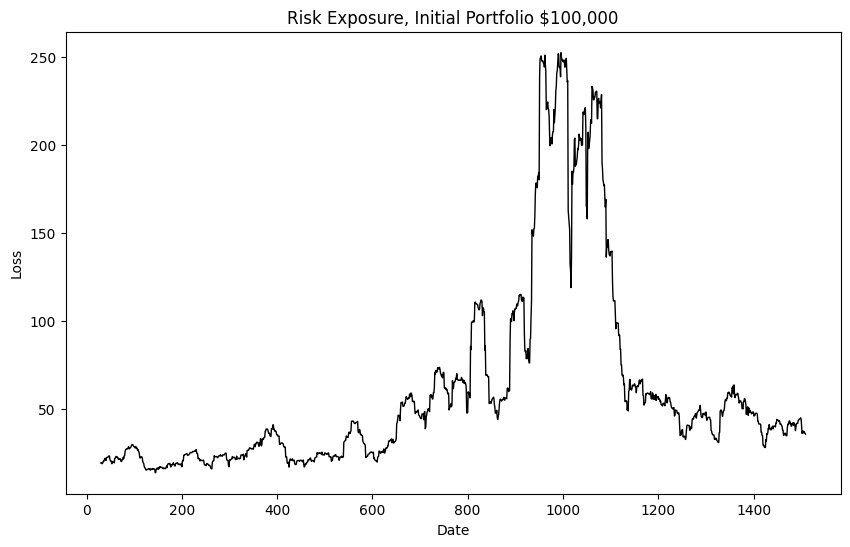

In [ ]:
from scipy.stats import t

# create a rolling window list
mu = portfolio_full['full_portfolio_returns'].rolling(30).mean() # the rolling window mean
mu = mu.dropna()
sigma = portfolio_full['full_portfolio_returns'].rolling(30).std() # the rolling window standard deviation
sigma = sigma.dropna()

# create the rolling window parameters
rolling_parameters =  [(29, m, s) for m, s in zip(mu, sigma)]

# compute the 99% VaR array using the rolling window parameters
VaR_99_t_dist = np.array ( [ t.ppf(0.99, *params) for params in rolling_parameters])

#print(mu)
# plot the minimum risk exposure over the 2005-2020 time period
plt.figure(figsize=(10,6))
plt.plot(mu.index, 0.01 * VaR_99_t_dist * 100000, color = 'black', linewidth = 1)
plt.xlabel("Date")
plt.ylabel("Loss")
plt.title("Risk Exposure, Initial Portfolio $100,000")
plt.show()

**CVaR and Risk Exposure:**

Recall that CVaR is the expected value of loss given a minimum loss threshold. So CVaR is already in the form of a risk exposure--it is the sum (or integral) of the probability of loss in the distribution tail multiplied, by the loss amount.

We want to derive the 99% CVaR for the crisis in the 2008-2009 period:
1. fit a T distribution to the portfolio_filtered losses during the crisis of 2008-2009 using `t.fit()`
2. compute the 99% VaR
3. finally, compute the 99% CVaR measure using `t.expect()`

In [ ]:
crisis_returns = pd.DataFrame()
crisis_returns['Date'] = Citigroup_filtered['Date']

for df in [Citigroup_filtered, MorganStanley_filtered, Goldman_filtered, JPMorgan_filtered]:
  df["Daily Return"] = df["Close"].pct_change()
 # df["Daily Return"] = pd.to_numeric(df["Daily Return"], errors="coerce")
  df.dropna(subset=["Daily Return"], inplace=True)


crisis_returns['crisis returns'] = (
    Citigroup_filtered["Daily Return"] +
    MorganStanley_filtered["Daily Return"] +
    Goldman_filtered["Daily Return"] +
    JPMorgan_filtered["Daily Return"]
)/4

crisis_losses = crisis_returns[crisis_returns['crisis returns'] < 0]
crisis_losses = crisis_losses.reset_index(drop=True)

#print(crisis_returns)

# Fit the Student's t distribution to crisis losses
p = t.fit(crisis_returns['crisis returns'].dropna()) # use this for the entire crisis returns
#p = t.fit(crisis_losses['crisis returns'].dropna()) # use this for the negative returns(losses) of the portfoilio during crisis
# Compute the VaR_99 for the fitted distribution
VaR_99_t_crisis = t.ppf(0.99, *p)

# Use the fitted parameters and VaR_99 to compute CVaR_99
tail_loss_crisis = t.expect(lambda y: y, args = (p[0],), loc =p[1], scale = p[2], lb = VaR_99_t_crisis)
# Lower bound (lb) defines the cutoff point for integration.
# p[0] is the degrees of freedom (ν) of the fitted t-distribution.
# p[1]: Mean (μ) of the fitted t-distribution.
# p[2]: Scale (σ) (similar to standard deviation but specific to the t-distribution).

CVaR_99_crisis = (1 / (1-0.99)) * tail_loss_crisis
print("CVaR of portfolio during 2008-2009 crisis: ",CVaR_99_crisis.round(5))


CVaR of portfolio during 2008-2009 crisis:  0.33266


**Risk Management using VaR and CVaR**